# Sweep Cost Matrix and Calculate Profit Curve

In [1]:
import numpy as np
import pandas as pd
import src.scrubbington as scrub
import src.evaluationton as evalu

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

### Read In and Clean Data

In [2]:
df_orig = pd.read_json('./data/data.json')

In [3]:
feature_list = ['channels', 'fb_published', 'has_analytics', 'has_logo', 'num_order', 'num_payouts', 
'sale_duration2', 'show_map', 'user_age', 'user_type', 'body_length']

In [4]:
df, y, X = scrub.scrub_everything(df_orig, feature_list)

In [5]:
#Note: default split perecentage is 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)

### Create RF Model

In [6]:
rf = RandomForestClassifier(random_state=0, n_estimators=500)

In [7]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Profit Curve Plotting Function

In [8]:
def plot_profit_curve(scoring, profit_matrix, num_points=100):
    x_threshold, y_profit = scoring.profit_curve(num_points=num_points, profit_matrix=profit_matrix)
    
    fig, ax = plt.subplots()
    ax.plot(x_threshold, y_profit)
    
    ymax = max(y_profit)
    xpos = y_profit.index(ymax)
    xmax = x_threshold[xpos]
    
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=180,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction", arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)
    ax.set_ylim(min(y_profit), ymax*2)
    ax.set_xlabel('Threshold For Predicting Fraud')
    ax.set_ylabel('Profit')
    ax.set_title('Profit Curve')
    plt.show()

### Scoring Our Model

In [9]:
scoring = evalu.Scores(model=rf, X_test=X_test, y_test=y_test)
scoring.scores()

Accuracy: 0.9684797768479777
Precision 0.8844765342960289
Recall 0.7515337423312883
F1 0.812603648424544


### Profit Matrix with Set Profit Matrix

In [10]:
false_pos = -500
true_pos  = 500
false_neg = 0
true_neg  = 0

profit_matrix = [[true_neg, false_pos],[false_neg, true_pos]]

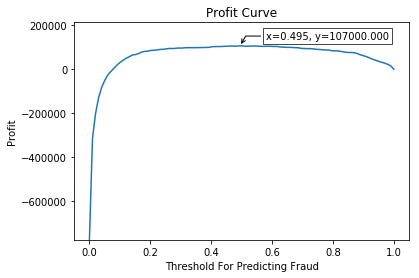

In [11]:
plot_profit_curve(scoring, profit_matrix, num_points=100)

### Sweeping Profit Matrix

In [12]:
false_pos = -100
true_pos  = 500
false_neg = 0
true_neg  = 0

profit_matrix = [[true_neg, false_pos],[false_neg, true_pos]]

NameError: name 'profit_sweep_plot' is not defined

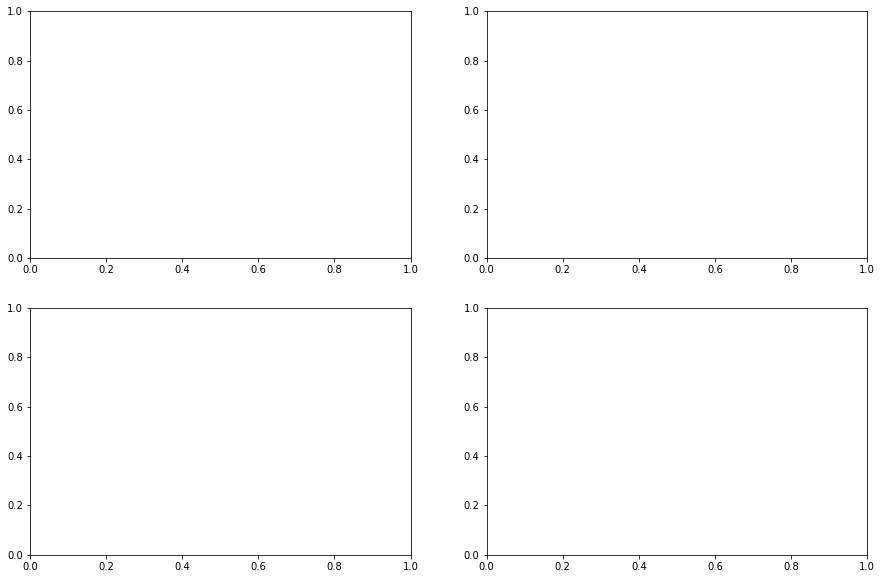

In [13]:
f, axis = plt.subplots(2,2, figsize=(15,10))
#axis[0].set_title('Profit Curves (sweeping profit matrix)')
false_pos = 0
for ax in axis.flatten():
    profit_matrix = [[true_neg, false_pos],[false_neg, true_pos]]
    profit_sweep_plot(scoring, profit_matrix, ax, num_points=100)
    false_pos -= 100
    

plt.show()


In [ ]:
def profit_sweep_plot(scoring, profit_matrix, ax, num_points=100):
    x_threshold, y_profit = scoring.profit_curve(num_points=num_points, profit_matrix=profit_matrix)
    
    ax.plot(x_threshold, y_profit)
    ax.set_title('False Pose: {}'.format(profit_matrix[0][1]))
    ymax = max(y_profit)
    xpos = y_profit.index(ymax)
    xmax = x_threshold[xpos]
    
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=180,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction", arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)
    ax.set_ylim(min(y_profit), ymax*2)
    
    ax.set_ylim(min(y_profit), ymax*2)
    